In [1]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import mlem.mlem_reconstruct as mr

## Read fastmc files:

In [2]:
def read_datafile(input_file, n_coincidences):

    df = pd.read_hdf(input_file)
    df = df.head(n_coincidences)

    true_r1   = df.true_r1  .values
    true_phi1 = df.true_phi1.values
    true_z1   = df.true_z1  .values
    true_t1   = df.true_t1  .values

    reco_r1   = df.reco_r1  .values
    reco_phi1 = df.reco_phi1.values
    reco_z1   = df.reco_z1  .values
    reco_t1   = df.reco_t1  .values

    true_r2   = df.true_r2  .values
    true_phi2 = df.true_phi2.values
    true_z2   = df.true_z2  .values
    true_t2   = df.true_t2  .values

    reco_r2   = df.reco_r2  .values
    reco_phi2 = df.reco_phi2.values
    reco_z2   = df.reco_z2  .values
    reco_t2   = df.reco_t2  .values

    event_ids = df.event_id .values

    return (event_ids, true_r1, true_phi1, true_z1, true_t1,
                       true_r2, true_phi2, true_z2, true_t2,
                       reco_r1, reco_phi1, reco_z1, reco_t1,
                       reco_r2, reco_phi2, reco_z2, reco_t2)

In [22]:
data_path      = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim/'
data_file      = data_path + 'full_body_phantom_sim_reco_thr1.5pes.0.h5'
n_coincidences = 10000

(evt, true_r1, true_phi1, true_z1, true_t1,
 true_r2, true_phi2, true_z2, true_t2,
 r1, phi1, z1, t1,
 r2, phi2, z2, t2) = read_datafile(data_file, n_coincidences)
print(f"Read {len(evt)} coincidences".format(len(evt)))

lor_x1 = r1*np.cos(phi1); lor_y1 = r1*np.sin(phi1); lor_z1 = z1; lor_t1 = t1;
lor_x2 = r2*np.cos(phi2); lor_y2 = r2*np.sin(phi2); lor_z2 = z2; lor_t2 = t2;

Read 9945 coincidences


## Perform the 3D PET reconstruction:

In [23]:
# Reconstruct the image
path_to_mlem = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
rec          = mr.MLEMReconstructor(libpath=path_to_mlem)
tof          = 150 # ps
n_iterations = 16
save_every   = 2

rec.TOF = True
if not tof:
    rec.TOF = False
rec.TOF_resolution = tof
rec.niterations    = n_iterations
rec.save_every     = save_every
reco_prefix_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim/fastsim_reco'
rec.prefix = reco_prefix_base + f'_TOF{tof}ps_{n_coincidences}coincidences'
img = rec.reconstruct(lor_x1, lor_y1, lor_z1, lor_t1, lor_x2, lor_y2, lor_z2, lor_t2)

Sensitivity matrix not specified: assuming a matrix of 1s.


## Load images

In [24]:
the_imgs = []

for i in range(0, n_iterations, save_every):
    img = rec.read_image(i)
    the_imgs.append(img)

Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes


## Plot images:

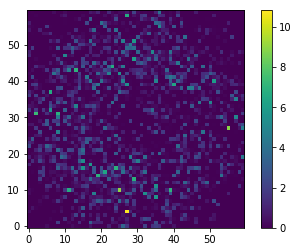

In [25]:
n_iter = 7
slice_min = 25
slice_max = 35
plt.imshow(np.sum(the_imgs[n_iter][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
plt.colorbar();

## Plot contrast recovery coefficient (CRC) as a function of the iteration

In [ ]:
crcs_hot_0, crcs_hot_1, crcs_hot_2, crcs_hot_3 = [], [], [], []
crcs_cold_0, crcs_cold_1 = [], []

err_crcs_hot_0, err_crcs_hot_1, err_crcs_hot_2, err_crcs_hot_3 = [], [], [], []
err_crcs_cold_0, err_crcs_cold_1 = [], []

for i in range(len(the_imgs)):
    crc_hot0, err_hot0 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity, hot_radii[0], radial_pos,\
                                        hot_angles[0], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot1, err_hot1 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity, hot_radii[1], radial_pos,\
                                        hot_angles[1], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot2, err_hot2 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity, hot_radii[2], radial_pos,\
                                        hot_angles[2], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot3, err_hot3 = fomf.crc_hot3d(the_imgs[i], sig_intensity, bckg_intensity, hot_radii[3], radial_pos,\
                                        hot_angles[3], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crcs_hot_0.append(crc_hot0*100)
    crcs_hot_1.append(crc_hot1*100)
    crcs_hot_2.append(crc_hot2*100)
    crcs_hot_3.append(crc_hot3*100)
    
    err_crcs_hot_0.append(err_hot0*100)
    err_crcs_hot_1.append(err_hot1*100)
    err_crcs_hot_2.append(err_hot2*100)
    err_crcs_hot_3.append(err_hot3*100)
    
    crc_cold0, err_cold0 = fomf.crc_cold3d(the_imgs[i], cold_radii[0], radial_pos, cold_angles[0], bckg_radius, phi0,\
                                           phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crc_cold1, err_cold1 = fomf.crc_cold3d(the_imgs[i], cold_radii[1], radial_pos, cold_angles[1], bckg_radius, phi0,\
                                           phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crcs_cold_0.append(crc_cold0*100)
    crcs_cold_1.append(crc_cold1*100)
    
    err_crcs_cold_0.append(err_cold0*100)
    err_crcs_cold_1.append(err_cold1*100)

In [ ]:
e,\
             color=light_red, marker='s', capsize=3, label='hot sphere 0')
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_hot_1, yerr=err_crcs_hot_1, xerr=None,\
             color=light_blue, marker='s', capsize=3, label='hot sphere 1')
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_hot_2, yerr=err_crcs_hot_2, xerr=None,\
             color=blue, marker='s', capsize=3, label='hot sphere 2')
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_hot_3, yerr=err_crcs_hot_3, xerr=None,\
             color=green, marker='s', capsize=3, label='hot sphere 3')
plt.xticks(list(range(0, n_iterations, save_every)))
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=2);

In [ ]:
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_cold_0, yerr=err_crcs_hot_0, xerr=None,\
             color=light_red, marker='s', capsize=3, label='cold sphere 0')
plt.errorbar(list(range(0, n_iterations, save_every)), crcs_cold_1, yerr=err_crcs_hot_1, xerr=None,\
             color=light_blue, marker='s', capsize=3, label='cold sphere 1')
plt.xticks(list(range(0, n_iterations, save_every)))
plt.xlabel('Number of iterations')
plt.ylabel('CRC (%)')
plt.legend(loc=2);

## Plot contrast recovery coefficient (CRC) as a function of the activity

In [ ]:
coincidence_list = list(range(100000, 400000, 100000)) # to make reconstructions with 1e5, 2e5, ... coincidences.
### The numbers of coincidences in this example are very low, so the error bars in the plot are very high.
### A higher number of coincidences needs to be used for a proper analysis.

reconstructions = []

for n in coincidence_list:
    (evt, true_r1, true_phi1, true_z1, true_t1,
     true_r2, true_phi2, true_z2, true_t2,
     r1, phi1, z1, t1,
     r2, phi2, z2, t2) = read_datafile(data_file, n)
    print("Read {} coincidences".format(len(evt)))

    lor_x1 = r1*np.cos(phi1); lor_y1 = r1*np.sin(phi1); lor_z1 = z1; lor_t1 = t1;
    lor_x2 = r2*np.cos(phi2); lor_y2 = r2*np.sin(phi2); lor_z2 = z2; lor_t2 = t2;
    
    rec = myreco.MLEMReconstructor(libpath=path_to_mlem)
    rec.TOF = True
    if not tof:
        rec.TOF = False
    rec.TOF_resolution = tof
    rec.niterations = n_iterations
    rec.save_every = save_every
    rec.prefix = reco_prefix_base + f'_TOF{tof}ps_{n}coincidences'
    rec.reconstruct(lor_x1, lor_y1, lor_z1, lor_t1, lor_x2, lor_y2, lor_z2, lor_t2)
    reconstructions.append(rec)

In [ ]:
the_imgs = [[] for i in range(0, len(coincidence_list))]

for i in range(0, len(coincidence_list)):
    for j in range(0, n_iterations, save_every):
        img = reconstructions[i].read_image(j)
        the_imgs[i].append(img)

In [ ]:
it = 6 # number of chosen iteration

crcs_hot_0, crcs_hot_1, crcs_hot_2, crcs_hot_3 = [], [], [], []
crcs_cold_0, crcs_cold_1 = [], []

err_crcs_hot_0, err_crcs_hot_1, err_crcs_hot_2, err_crcs_hot_3 = [], [], [], []
err_crcs_cold_0, err_crcs_cold_1 = [], []

for i in range(len(the_imgs)):
    crc_hot0, err_hot0 = fomf.crc_hot3d(the_imgs[i][it], sig_intensity, bckg_intensity, hot_radii[0], radial_pos,\
                                        hot_angles[0], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot1, err_hot1 = fomf.crc_hot3d(the_imgs[i][it], sig_intensity, bckg_intensity, hot_radii[1], radial_pos,\
                                        hot_angles[1], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot2, err_hot2 = fomf.crc_hot3d(the_imgs[i][it], sig_intensity, bckg_intensity, hot_radii[2], radial_pos,\
                                        hot_angles[2], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crc_hot3, err_hot3 = fomf.crc_hot3d(the_imgs[i][it], sig_intensity, bckg_intensity, hot_radii[3], radial_pos,\
                                        hot_angles[3], bckg_radius, phi0, phi_step, n_phi, x_size, y_size, z_size,\
                                        x_bins, y_bins, z_bins)
    crcs_hot_0.append(crc_hot0*100)
    crcs_hot_1.append(crc_hot1*100)
    crcs_hot_2.append(crc_hot2*100)
    crcs_hot_3.append(crc_hot3*100)
    
    err_crcs_hot_0.append(err_hot0*100)
    err_crcs_hot_1.append(err_hot1*100)
    err_crcs_hot_2.append(err_hot2*100)
    err_crcs_hot_3.append(err_hot3*100)
    
    crc_cold0, err_cold0 = fomf.crc_cold3d(the_imgs[i][it], cold_radii[0], radial_pos, cold_angles[0], bckg_radius, phi0,\
                                           phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crc_cold1, err_cold1 = fomf.crc_cold3d(the_imgs[i][it], cold_radii[1], radial_pos, cold_angles[1], bckg_radius, phi0,\
                                           phi_step, n_phi, x_size, y_size, z_size, x_bins, y_bins, z_bins)
    crcs_cold_0.append(crc_cold0*100)
    crcs_cold_1.append(crc_cold1*100)
    
    err_crcs_cold_0.append(err_cold0*100)
    err_crcs_cold_1.append(err_cold1*100)

In [ ]:
plt.errorbar(list(range(1, len(coincidence_list)+1)), crcs_hot_0, yerr=err_crcs_hot_0, xerr=None, color=light_red,\
             marker='s', capsize=3)
plt.xticks(list(range(1, len(coincidence_list)+1)))
plt.xlabel(f'Number of coincidences used (x $10^5$)')
plt.ylabel('CRC (%)');